# Info
Purpose:

    Explore some MODIS cloud fraction and subsequent fire counts

Input:

    None

Output:

    Figure and save files

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
    - Sp_parameters
    - write_utils
    - path_utils
    - hdf5storage
    - scipy

Needed Files:
  - MYD06 and MYD14 hdf files

Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2021-05-11
    Modified:


# Prepare python environment

In [1]:
import numpy as np
import Sp_parameters as Sp
import load_utils as lu
import write_utils as wu
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

import os
from mpl_toolkits.basemap import Basemap
%matplotlib notebook

In [11]:
%matplotlib notebook

In [2]:
name = 'FOG2FIRE'
vv = 'v1'
fp = getpath(name)


Return path named:  FOG2FIRE /data/sam/FOG2FIRE/


In [227]:
nomap = True

# Plan out the regions

In [41]:
if not nomap:
    def make_map(ax=plt.gca()):
        m = Basemap(projection='stere',lon_0=-122.0,lat_0=38.0,
                llcrnrlon=-131.0, llcrnrlat=32.0,
                urcrnrlon=-108.0, urcrnrlat=48,resolution='i',ax=ax)
        m.drawcoastlines()
        #m.fillcontinents(color='#AAAAAA')
        m.drawstates()
        m.drawcountries()
        m.drawmeridians(np.linspace(-131,-108,6),labels=[0,0,0,1])
        m.drawparallels(np.linspace(31,48,9),labels=[1,0,0,0])
        def format_coord(x, y):
            return 'x=%.4f, y=%.4f'%(m(x, y, inverse = True))
        ax.format_coord = format_coord
        return m
    make_map()

In [43]:
rgs = [[[32.5,-121.5],[35.5,-117.0]],
       [[32.5,-117.0],[35.5,-114.0]],
       [[35.5,-123.5],[38.5,-120.8]],
       [[35.5,-120.8],[38.5,-115.0]],
       [[38.5,-125.0],[42.0,-122.0]],
       [[38.5,-122.0],[42.0,-118.0]],
       [[42.0,-125.0],[47.0,-122.0]],
       [[42.0,-122.0],[47.0,-115.0]]]
       #lower left [lat lon], upper right [lat lon]
lbls = ['Socal Coast','Socal land','Central coast','Central Sierras',
        'Norcal coast','Northern Sierras','Oregon Coast','Oregon mountains']

In [49]:
regions = {'ocean':[[[32.5,-131],[35.5,-121.5]],[[35.5,-131.0],[38.5,-123.5]], [[38.5,-131.0],[42.0,-125.0]],[[42.0,-131.0],[47.0,-125.0]]],
           'coast':[[[32.5,-121.5],[35.5,-117.0]],[[35.5,-123.5],[38.5,-120.8]], [[38.5,-125.0],[42.0,-122.0]],[[42.0,-125.0],[47.0,-122.0]]],
           'land':[[[32.5,-117.0],[35.5,-114.0]],[[35.5,-120.8],[38.5,-115.0]],[[38.5,-122.0],[42.0,-118.0]],[[42.0,-122.0],[47.0,-115.0]]]
          }

lbls_rg = {'ocean':['SoCal','Central','NorCal','Oregon'],
           'coast':['SoCal','Central','NorCal','Oregon'],
           'land':['SoCal','Central Sierras','Northern Sierras','Oregon mountains']
          }
ls = {'ocean':':','coast':'-','land':'--'}

<IPython.core.display.Javascript object>


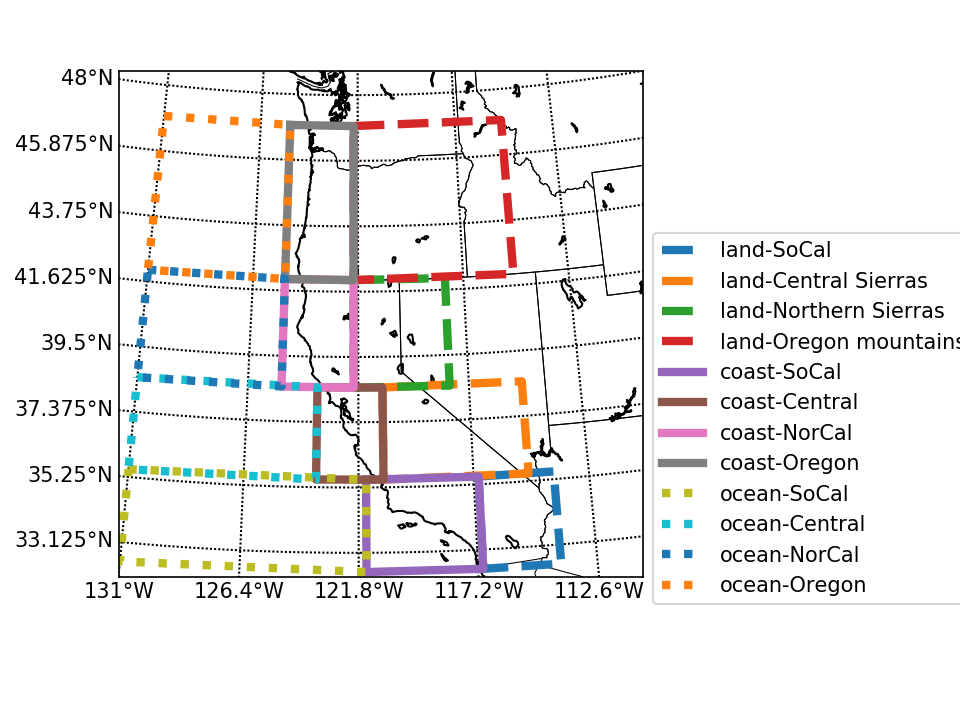

In [56]:
if not nomap:
    fig, ax = plt.subplots(1,1)
    m = make_map(ax)
    for re in regions:
        for i,r in enumerate(regions[re]):
            m.plot([r[0][1],r[1][1],r[1][1],r[0][1],r[0][1]],[r[1][0],r[1][0],r[0][0],r[0][0],r[1][0]],
                   latlon=True,label=re+'-'+lbls_rg[re][i],lw=4,ls=ls[re])
    plt.legend(bbox_to_anchor=[1.0,0.7])
    plt.tight_layout(rect=[0.1,-0.4,0.95,1.5])

    plt.savefig(fp+'plots/Map_regions.png',dpi=400,transparent=True)

# Load files

## Load the Cloud files

In [62]:
lc = os.listdir(fp+'MYD06/')

In [228]:
lc.sort()

In [125]:
nfiles = len(lc)
ifile = 0

In [134]:
vals = (('CF',160),('CF_night',162),('CF_day',164),('cld_top',143),('scan_time',126),
('sza',127),('surf_temp',140),('lat',124),('lon',125),('QA',235),('cld_mask',234))

In [136]:
clds = []
for i,l in enumerate(lc):
    cld,cld_dict = lu.load_hdf(fp+'MYD06/'+l,values=vals,verbose=False)
    clds.append(cld)

*** Can not replace NaN into variable: surf_temp, for the bad points (array([], dtype=int64), array([], dtype=int64)) ***
*** Can not replace NaN into variable: surf_temp, for the bad points (array([], dtype=int64), array([], dtype=int64)) ***
*** Can not replace NaN into variable: surf_temp, for the bad points (array([], dtype=int64), array([], dtype=int64)) ***
*** Can not replace NaN into variable: surf_temp, for the bad points (array([], dtype=int64), array([], dtype=int64)) ***
*** Can not replace NaN into variable: surf_temp, for the bad points (array([], dtype=int64), array([], dtype=int64)) ***
*** Can not replace NaN into variable: surf_temp, for the bad points (array([], dtype=int64), array([], dtype=int64)) ***
*** Can not replace NaN into variable: surf_temp, for the bad points (array([], dtype=int64), array([], dtype=int64)) ***
*** Can not replace NaN into variable: surf_temp, for the bad points (array([], dtype=int64), array([], dtype=int64)) ***
*** Can not replace NaN 

In [181]:
for c in clds:
    c['surf_temp'] = (c['surf_temp']+15000)*0.00999999977648258

In [73]:
cld_dict['CF']

{'ALGORITHMPACKAGEACCEPTANCEDATE': 'June 1997',
 'ALGORITHMPACKAGEMATURITYCODE': 'at-launch',
 'ALGORITHMPACKAGENAME': 'ATBD-MOD-04 and ATBD-MOD-05',
 'ALGORITHMPACKAGEVERSION': '2',
 'ALGORITHM_VERSION_CLOUD_PHASE_IR': '1',
 'ALGORITHM_VERSION_CLOUD_PROPERTY_VIS': '1',
 'ALGORITHM_VERSION_CLOUD_TOP_PROPERTY_IR': '1',
 'ANCILLARYINPUTPOINTER.1': 'MYD03.A2020141.0940.061.2020142143726.hdf',
 'ANCILLARYINPUTTYPE.1': 'Geolocation',
 'ASSOCIATEDINSTRUMENTSHORTNAME.1': 'MODIS',
 'ASSOCIATEDPLATFORMSHORTNAME.1': 'Aqua',
 'ASSOCIATEDSENSORSHORTNAME.1': 'MODIS',
 'AUTOMATICQUALITYFLAG.1': 'Passed',
 'AUTOMATICQUALITYFLAGEXPLANATION.1': 'Passed: >10% useable; Failed: <10% useable',
 'Cell_Across_Swath_Sampling': '3, 1348, 5',
 'Cell_Along_Swath_Sampling': '3, 2028, 5',
 'CirrusCloudDetectedPct_IR': '   55.63',
 'Clear_Sky_Restoral_Status': 'y',
 'CloudPhaseUncertainPct_IR': '   23.74',
 'Collection_4_Phase_Used': 'n',
 'DAYNIGHTFLAG': 'Night',
 'DESCRREVISION': '6.1',
 'EASTBOUNDINGCOORDINATE':

In [74]:
cld['CF']

array([[0.99999998, 0.99999998, 0.99999998, ..., 0.99999998, 0.99999998,
        0.99999998],
       [0.99999998, 0.99999998, 0.99999998, ..., 0.99999998, 0.99999998,
        0.99999998],
       [0.99999998, 0.99999998, 0.99999998, ..., 0.99999998, 0.99999998,
        0.99999998],
       ...,
       [0.99999998, 0.99999998, 0.99999998, ..., 0.79999998, 0.99999998,
        0.99999998],
       [0.99999998, 0.99999998, 0.99999998, ..., 0.83999998, 0.99999998,
        0.99999998],
       [0.99999998, 0.99999998, 0.99999998, ..., 0.16      , 0.87999998,
        0.99999998]])

<IPython.core.display.Javascript object>


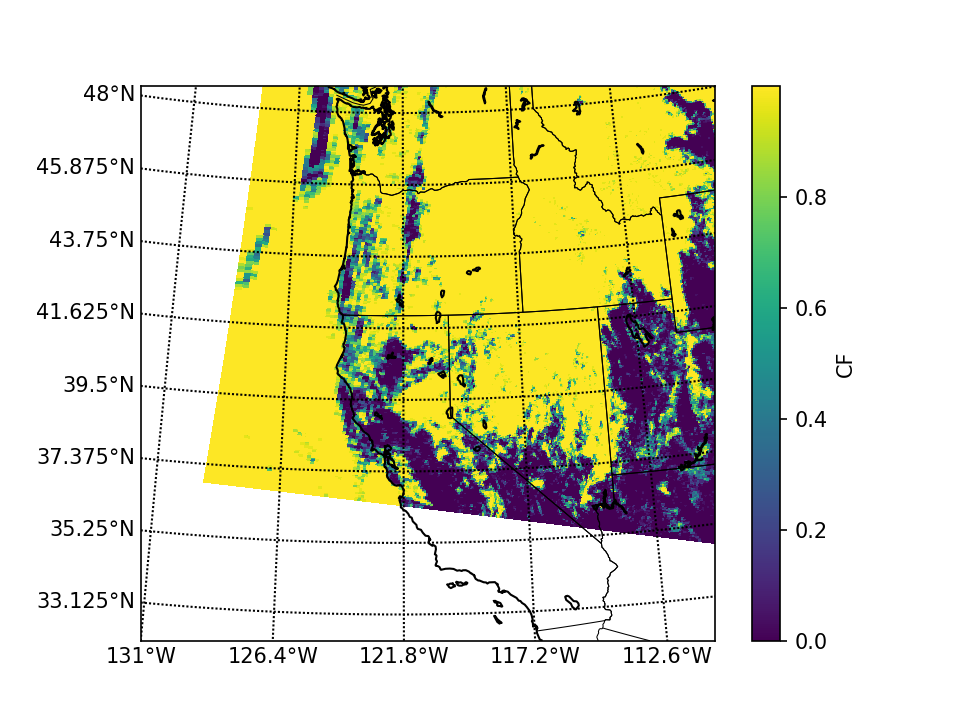

In [80]:
if not nomap:
    fig, ax = plt.subplots(1,1)
    m = make_map(ax)
    mcf = m.pcolor(cld['lon'],cld['lat'],cld['CF'],latlon=True)
    plt.colorbar(mcf,label='CF')

## Define stats and get from regions

In [154]:
time = []
for i,c in enumerate(clds):
    time.append(datetime(1993,1,1,0,0,0)+timedelta(seconds=c['scan_time'][0,0]))
time = np.array(time)

In [127]:
def stats(lon,lat,data,rg):
    'returns array of mean, median, std, and num for define area'
    i = (lon >= rg[0][1]) & (lon <= rg[1][1]) & (lat >= rg[0][0]) & (lon <= rg[1][0])
    me = np.nanmean(data[i])
    md = np.nanmedian(data[i])
    st = np.nanstd(data[i])
    nu = len(np.isfinite(data[i]))
    return [me,md,st,nu]

In [196]:
cf = {}
for re in regions:
    nre = len(regions[re])
    cf[re] = {u'mean':np.zeros((nfiles,nre))+np.nan,
              u'median':np.zeros((nfiles,nre))+np.nan,
              u'std':np.zeros((nfiles,nre))+np.nan,
              u'num':np.zeros((nfiles,nre))+np.nan}
    for i,r in enumerate(regions[re]):
        for ifile in range(nfiles):
            cf[re]['mean'][ifile,i],cf[re]['median'][ifile,i],cf[re]['std'][ifile,i],cf[re]['num'][ifile,i] =\
               stats(clds[ifile]['lon'],clds[ifile]['lat'],clds[ifile]['CF'],r)

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


In [138]:
cf

{'coast': {'mean': array([[0.73982508, 0.75238257, 0.77643655, 0.86948452],
         [0.3873233 , 0.58495771, 0.70395596, 0.96646073],
         [0.48805183, 0.56572682, 0.61543988, 0.78097812],
         [0.80577976, 0.61012763, 0.49277939, 0.51601123],
         [0.66965525, 0.58531985, 0.57008258, 0.73732744],
         [0.17559358, 0.58335713,        nan,        nan],
         [0.94642248, 0.9436108 , 0.9211919 , 0.9328981 ],
         [0.45331136, 0.45273827, 0.56745502, 0.80142103],
         [0.32388961, 0.57527674,        nan,        nan],
         [       nan, 0.90314813, 0.85124244, 0.84905751],
         [0.58216413, 0.63008998, 0.58386315, 0.78997596],
         [       nan,        nan,        nan,        nan]]),
  'median': array([[0.99999998, 0.99999998, 0.99999998, 0.99999998],
         [0.08      , 0.91999998, 0.99999998, 0.99999998],
         [0.47999999, 0.71999998, 0.79999998, 0.95999998],
         [0.99999998, 0.75999998, 0.43999999, 0.47999999],
         [0.99999998, 0.679

In [197]:
cld_top = {}
for re in regions:
    nre = len(regions[re])
    cld_top[re] = {u'mean':np.zeros((nfiles,nre))+np.nan,
              u'median':np.zeros((nfiles,nre))+np.nan,
              u'std':np.zeros((nfiles,nre))+np.nan,
              u'num':np.zeros((nfiles,nre))+np.nan}
    for i,r in enumerate(regions[re]):
        for ifile in range(nfiles):
            igood = (clds[ifile]['cld_top']>0.0)
            cld_top[re]['mean'][ifile,i],cld_top[re]['median'][ifile,i],\
            cld_top[re]['std'][ifile,i],cld_top[re]['num'][ifile,i] =\
               stats(clds[ifile]['lon'][igood],clds[ifile]['lat'][igood],clds[ifile]['cld_top'][igood],r)

In [198]:
surf_temp = {}
for re in regions:
    nre = len(regions[re])
    surf_temp[re] = {u'mean':np.zeros((nfiles,nre))+np.nan,
              u'median':np.zeros((nfiles,nre))+np.nan,
              u'std':np.zeros((nfiles,nre))+np.nan,
              u'num':np.zeros((nfiles,nre))+np.nan}
    for i,r in enumerate(regions[re]):
        for ifile in range(nfiles):
            surf_temp[re]['mean'][ifile,i],surf_temp[re]['median'][ifile,i],\
            surf_temp[re]['std'][ifile,i],surf_temp[re]['num'][ifile,i] =\
               stats(clds[ifile]['lon'],clds[ifile]['lat'],clds[ifile]['surf_temp'],r)

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


In [161]:
sza = {}
for re in regions:
    nre = len(regions[re])
    sza[re] = np.zeros((nfiles,nre))+np.nan
    for i,r in enumerate(regions[re]):
        for ifile in range(nfiles):
            sza[re][ifile,i],md,st,nu =\
               stats(clds[ifile]['lon'],clds[ifile]['lat'],clds[ifile]['sza'],r)

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


In [183]:
surf_temp

{'coast': {'mean': array([[277.8759344 , 279.50346733, 280.58619864, 280.27270207],
         [279.48401278, 280.1140719 , 281.70447692, 281.52219938],
         [291.95221794, 287.68401377, 285.53840172, 283.99939802],
         [276.48966293, 277.62776048, 279.25058339, 278.92666484],
         [290.62355533, 288.62172194, 286.94863843, 285.32453107],
         [285.82618694, 286.23644003,          nan,          nan],
         [266.11737181, 267.53604952, 268.99536015, 267.68217997],
         [294.51660791, 289.75574369, 287.35538967, 284.63140153],
         [285.99244433, 286.46080541,          nan,          nan],
         [         nan, 281.32629001, 284.02275602, 283.9944857 ],
         [281.56368021, 279.4823045 , 279.86552983, 279.18490969],
         [         nan,          nan,          nan,          nan]]),
  'median': array([[277.82999379, 279.06999376, 280.65999373, 280.34999373],
         [278.64999377, 279.18999376, 281.41999371, 281.23999371],
         [289.43999353, 286.51999

# Prep for saving

In [199]:
data = {'CF':cf,'surf_temp':surf_temp,'sza':sza,'cld_top':cld_top,'time':time,'regions':regions,'lbls_rg':lbls_rg}

In [200]:
import write_utils as wu
data = wu.iterate_dict_unicode(data)

no sza
no CF
no regions
no cld_top
no time
no surf_temp
no lbls_rg


In [207]:
np.save(fp+'MYD06_{}.npy'.format(vv),data,allow_pickle=True)